Disciplina: Aprendizagem de Máquina

Período: 2025.1

Professor: César Lincoln Cavalcante Mattos

Aluno: Davi Teixeira Silva

# Lista 6 - K-médias e PCA

## Questão 1

Considere o conjunto de dados disponível em quake.csv, organizado em 2 colunas de atributos. Os dados referem-se a latitudes e longitudes de locais em que foram registrados terremotos. Maiores detalhes sobre os dados podem ser
conferidos em https://www.openml.org/d/772.

a) Avalie o algoritmo K-médias com distância Euclidiana na tarefa de agrupamento para tais dados. O número de grupos deve ser escolhido entre os valores 4, 5, 6, . . . , 19, 20 a partir do índice DB (Davies-Bouldin). Plote o
melhor resultado de agrupamento obtido.

Observação: Em cada avaliação repita múltiplas vezes (por exemplo, 20) a execução do algoritmo K-médias, escolhendo a solução com melhor erro de reconstrução.

b) Repita o item anterior considerando a distância de Mahalanobis.

Observação: Note que o índice DB deve ser alterado para usar a distância de Mahalanobis neste item.

K=4, DB Index=0.6140
K=5, DB Index=0.6199
K=6, DB Index=0.6175
K=7, DB Index=0.6346
K=8, DB Index=0.7753
K=9, DB Index=0.6524
K=10, DB Index=0.6118
K=11, DB Index=0.6249
K=12, DB Index=0.6493
K=13, DB Index=0.6581
K=14, DB Index=0.5999
K=15, DB Index=0.5893
K=16, DB Index=0.6983
K=17, DB Index=0.6134
K=18, DB Index=0.6056
K=19, DB Index=0.6073
K=20, DB Index=0.6298

Melhor K: 15 com DB=0.5893


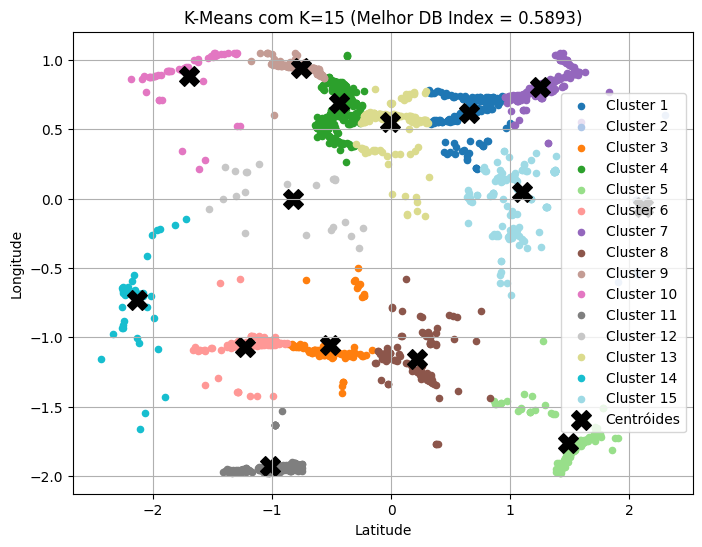

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar dados
data = np.genfromtxt('quake.csv', delimiter=',')
X = data[:, :2]

# Normalização dos dados (Z-score)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

n_samples, n_features = X.shape

# ------------------------
# Funções auxiliares
# ------------------------

def euclidean(a, b):
    return np.linalg.norm(a - b)

def assign_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for i, x in enumerate(X):
        distances = [euclidean(x, c) for c in centroids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(i)
    return clusters

def update_centroids(X, clusters):
    return np.array([np.mean(X[cluster], axis=0) if len(cluster) > 0 else np.zeros(X.shape[1]) for cluster in clusters])

def reconstruction_error(X, clusters, centroids):
    error = 0
    for k, cluster in enumerate(clusters):
        for i in cluster:
            error += euclidean(X[i], centroids[k]) ** 2
    return error

def db_index(X, clusters, centroids):
    n_clusters = len(clusters)
    S = np.zeros(n_clusters)
    for k in range(n_clusters):
        if len(clusters[k]) == 0:
            continue
        S[k] = np.mean([euclidean(X[i], centroids[k]) for i in clusters[k]])

    R = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            if i != j:
                denominator = euclidean(centroids[i], centroids[j])
                if denominator != 0:
                    R[i, j] = (S[i] + S[j]) / denominator
    D = np.max(R, axis=1)
    return np.mean(D)

def kmeans(X, k, max_iter=100):
    best_error = np.inf
    best_clusters = None
    best_centroids = None

    for _ in range(20):  # 20 execuções
        centroids = X[np.random.choice(len(X), k, replace=False)]
        for _ in range(max_iter):
            clusters = assign_clusters(X, centroids)
            new_centroids = update_centroids(X, clusters)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        error = reconstruction_error(X, clusters, centroids)
        if error < best_error:
            best_error = error
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids

# ------------------------
# Rodar KMeans para K de 4 a 20
# ------------------------

best_k = None
best_db = np.inf
final_clusters = None
final_centroids = None

for k in range(4, 21):
    clusters, centroids = kmeans(X, k)
    db = db_index(X, clusters, centroids)
    print(f"K={k}, DB Index={db:.4f}")
    if db < best_db:
        best_db = db
        best_k = k
        final_clusters = clusters
        final_centroids = centroids

print(f"\nMelhor K: {best_k} com DB={best_db:.4f}")

# ------------------------
# Plotar agrupamento
# ------------------------

colors = plt.get_cmap("tab20", best_k)

plt.figure(figsize=(8, 6))
for i, cluster in enumerate(final_clusters):
    points = X[cluster]
    plt.scatter(points[:, 0], points[:, 1], s=20, color=colors(i), label=f"Cluster {i+1}")
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, color='black', marker='X', label='Centróides')
plt.title(f"K-Means com K={best_k} (Melhor DB Index = {best_db:.4f})")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()


K=4, DB Index (Mahalanobis)=0.5887
K=5, DB Index (Mahalanobis)=0.6434
K=6, DB Index (Mahalanobis)=0.7338
K=7, DB Index (Mahalanobis)=0.6210
K=8, DB Index (Mahalanobis)=0.7220
K=9, DB Index (Mahalanobis)=0.6481
K=10, DB Index (Mahalanobis)=0.6141
K=11, DB Index (Mahalanobis)=0.6040
K=12, DB Index (Mahalanobis)=0.5710
K=13, DB Index (Mahalanobis)=0.6098
K=14, DB Index (Mahalanobis)=0.5945
K=15, DB Index (Mahalanobis)=0.5821
K=16, DB Index (Mahalanobis)=0.6223
K=17, DB Index (Mahalanobis)=0.6780
K=18, DB Index (Mahalanobis)=0.6151
K=19, DB Index (Mahalanobis)=0.6505
K=20, DB Index (Mahalanobis)=0.5797

Melhor K: 12 com DB (Mahalanobis) = 0.5710


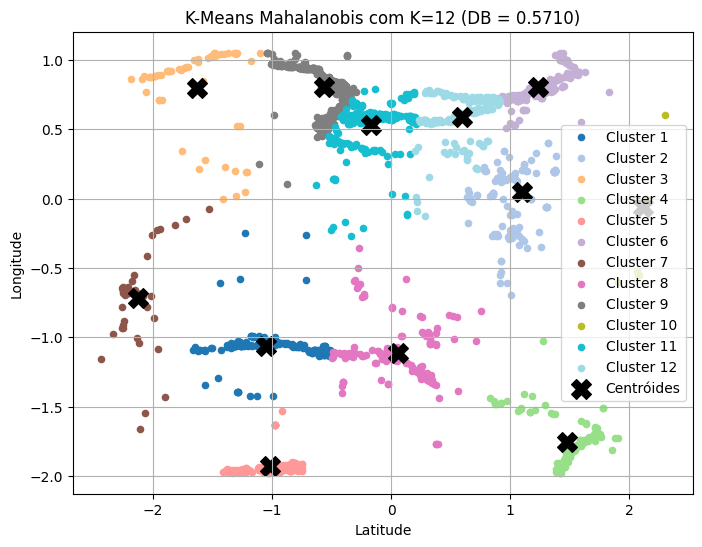

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar dados
data = np.genfromtxt('quake.csv', delimiter=',')
X = data[:, :2]

# Normalização dos dados (Z-score)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

n_samples, n_features = X.shape

# 2. Calcular matriz de covariância inversa (fixa para todo o conjunto)
cov_matrix = np.cov(X.T)
inv_cov = np.linalg.inv(cov_matrix)

# ------------------------
# Funções auxiliares
# ------------------------

def mahalanobis(x, y, inv_cov):
    delta = x - y
    return np.sqrt(np.dot(np.dot(delta, inv_cov), delta.T))

def assign_clusters_mahalanobis(X, centroids, inv_cov):
    clusters = [[] for _ in range(len(centroids))]
    for i, x in enumerate(X):
        distances = [mahalanobis(x, c, inv_cov) for c in centroids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(i)
    return clusters

def update_centroids(X, clusters):
    return np.array([np.mean(X[cluster], axis=0) if len(cluster) > 0 else np.zeros(X.shape[1]) for cluster in clusters])

def reconstruction_error_mahalanobis(X, clusters, centroids, inv_cov):
    error = 0
    for k, cluster in enumerate(clusters):
        for i in cluster:
            error += mahalanobis(X[i], centroids[k], inv_cov) ** 2
    return error

def db_index_mahalanobis(X, clusters, centroids, inv_cov):
    n_clusters = len(clusters)
    S = np.zeros(n_clusters)
    for k in range(n_clusters):
        if len(clusters[k]) == 0:
            continue
        S[k] = np.mean([mahalanobis(X[i], centroids[k], inv_cov) for i in clusters[k]])

    R = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            if i != j:
                denominator = mahalanobis(centroids[i], centroids[j], inv_cov)
                if denominator != 0:
                    R[i, j] = (S[i] + S[j]) / denominator
    D = np.max(R, axis=1)
    return np.mean(D)

def kmeans_mahalanobis(X, k, inv_cov, max_iter=100):
    best_error = np.inf
    best_clusters = None
    best_centroids = None

    for _ in range(20):  # 20 execuções
        centroids = X[np.random.choice(len(X), k, replace=False)]
        for _ in range(max_iter):
            clusters = assign_clusters_mahalanobis(X, centroids, inv_cov)
            new_centroids = update_centroids(X, clusters)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        error = reconstruction_error_mahalanobis(X, clusters, centroids, inv_cov)
        if error < best_error:
            best_error = error
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids

# ------------------------
# Rodar KMeans com distância de Mahalanobis
# ------------------------

best_k = None
best_db = np.inf
final_clusters = None
final_centroids = None

for k in range(4, 21):
    clusters, centroids = kmeans_mahalanobis(X, k, inv_cov)
    db = db_index_mahalanobis(X, clusters, centroids, inv_cov)
    print(f"K={k}, DB Index (Mahalanobis)={db:.4f}")
    if db < best_db:
        best_db = db
        best_k = k
        final_clusters = clusters
        final_centroids = centroids

print(f"\nMelhor K: {best_k} com DB (Mahalanobis) = {best_db:.4f}")

# ------------------------
# Plotar agrupamento
# ------------------------

colors = plt.get_cmap("tab20", best_k)

plt.figure(figsize=(8, 6))
for i, cluster in enumerate(final_clusters):
    points = X[cluster]
    plt.scatter(points[:, 0], points[:, 1], s=20, color=colors(i), label=f"Cluster {i+1}")
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, color='black', marker='X', label='Centróides')
plt.title(f"K-Means Mahalanobis com K={best_k} (DB = {best_db:.4f})")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()


## Conclusão da questão 1

Após aplicar o algoritmo K-Médias ao conjunto de dados quake.csv com os dados previamente normalizados (Z-score), observou-se que:

- Usando **distância Euclidiana**, o melhor agrupamento foi obtido com **K=15**, resultando em um índice de Davies-Bouldin (DB) igual a **0.5893**.

- Usando **distância de Mahalanobis**, o melhor agrupamento ocorreu com **K=12**, apresentando um DB **menor**, de **0.5710**.

Isso indica que, com **dados normalizados**, a distância de Mahalanobis apresentou **melhor separação entre os clusters** do que a Euclidiana. Isso é condizente com o fato de que Mahalanobis leva em conta a variância e correlação entre atributos, sendo mais adequada quando os dados possuem estruturas mais complexas.

## Questão 2

Considere o conjunto de dados disponível em penguins.csv, organizado em 5 colunas, sendo 4 colunas de atributos e a última a classe do padrão. Os dados referem-se a medições anatômicas de pinguins da Antártida, classificados nas espécies Adelie, Chinstrap e Gentoo. Maiores detalhes sobre os dados podem ser conferidos em https://allisonhorst.github.io/palmerpenguins/.

a) Apresente a projeção em 2 dimensões dos padrões acima obtida pelo método PCA (análise dos componentes principais).

b) Ainda considerando o item anterior, calcule e mostre a variância explicada obtida quando a dimensão projetada é modificada (1,2,3 ou 4).

Observação: Não esqueça de normalizar os dados em ambas as questões.

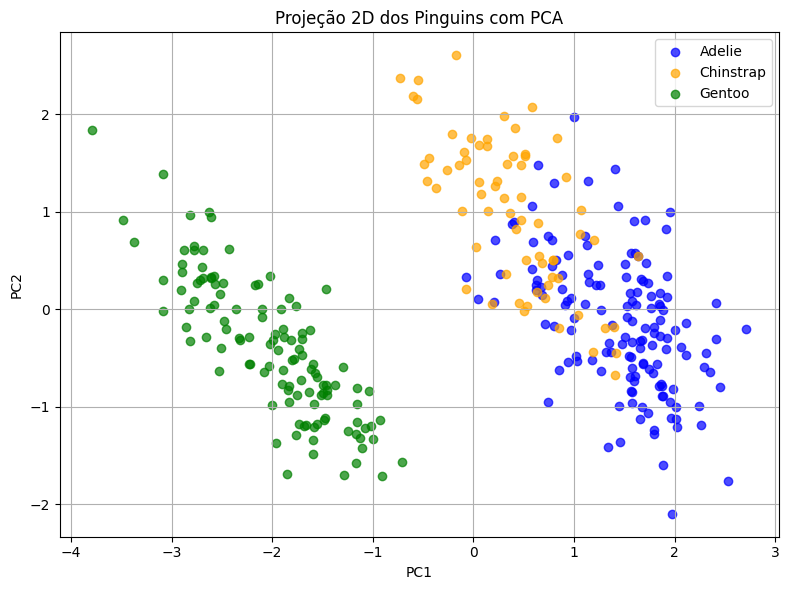


Variância explicada pelos principais componentes:
1 componente(s): Variância explicada = 68.63%
2 componente(s): Variância explicada = 88.09%
3 componente(s): Variância explicada = 97.30%
4 componente(s): Variância explicada = 100.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === Carregando os dados ===
data = np.genfromtxt('penguins.csv', delimiter=',')

# Separando atributos e classes
X = data[:, :4]   # 4 atributos
y = data[:, 4]    # classe (codificada como 0, 1 ou 2)

# Normalização (Z-score)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# Função PCA do zero
def pca(X, n_components):
    # Calcula matriz de covariância
    cov_matrix = np.cov(X.T)

    # Autovalores e autovetores
    eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

    # Ordena os autovalores em ordem decrescente
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]

    # Projeta os dados nos n_components principais
    X_pca = X @ eig_vecs[:, :n_components]
    return X_pca, eig_vals

# === (a) PCA com 2 componentes ===
X_pca, eig_vals = pca(X_norm, n_components=2)

# Plot da projeção em 2D com cores por espécie
colors = ['blue', 'orange', 'green']
labels = ['Adelie', 'Chinstrap', 'Gentoo']

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=labels[i], alpha=0.7, color=colors[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção 2D dos Pinguins com PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Variância explicada para 1 a 4 componentes
total_var = np.sum(eig_vals)
explained_variance = [(eig / total_var) * 100 for eig in eig_vals]

# Exibe a variância explicada
print("\nVariância explicada pelos principais componentes:")
for i in range(4):
    print(f"{i+1} componente(s): Variância explicada = {sum(explained_variance[:i+1]):.2f}%")



### Conclusão da Questão 2

Inicialmente, os dados foram normalizados utilizando o método Z-score, conforme orientado no enunciado. Em seguida, realizei a projeção dos dados em duas dimensões (2D), utilizando os dois primeiros componentes principais. O gráfico gerado mostrou uma separação visual clara entre as espécies, especialmente para a espécie Gentoo, que se destacou ao longo do primeiro componente principal.

## Conclusão Geral do Trabalho

Na Questão 1, a comparação entre as distâncias Euclidiana e de Mahalanobis evidenciou que, com os dados normalizados, a distância de Mahalanobis produziu agrupamentos com melhor qualidade (menor índice de Davies-Bouldin), destacando-se como mais eficiente na detecção de padrões complexos e correlacionados.

Já na Questão 2, foi utilizado o PCA para reduzir a dimensionalidade dos dados dos pinguins e facilitar sua visualização. A projeção em 2D permitiu observar uma separação razoável entre as espécies, com alta preservação da variância original (88.09%). Isso demonstrou a eficácia do PCA como ferramenta para compressão de dados e análise exploratória, mantendo a maior parte da informação relevante.